In [1]:
import kagglehub
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [10]:
# Step 1: Download the Amazon Product Reviews dataset
print("Downloading dataset...")
dataset_path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")
print("Dataset downloaded to:", dataset_path)

Dataset downloaded to: /root/.cache/kagglehub/datasets/arhamrumi/amazon-product-reviews/versions/1


In [16]:
import os
import glob
import dask.dataframe as dd

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [17]:
# Step 2: Check the contents of the dataset directory
print("Checking contents of the dataset directory...")
print(os.listdir(dataset_path))

# Step 3: Find CSV files recursively in the dataset directory
csv_files = glob.glob(os.path.join(dataset_path, '**/*.csv'), recursive=True)

# Step 4: If CSV files are found, read them using Dask
if csv_files:
    file_path = csv_files[0]  # Use the first CSV file for example
    print(f"Reading data from: {file_path}")
    df = dd.read_csv(file_path)
    # Or read all CSV files (uncomment if you want to read multiple files)
    # df = dd.read_csv(csv_files)
else:
    print("No CSV files found in the dataset directory.")

Checking contents of the dataset directory...
['Reviews.csv']
Reading data from: /root/.cache/kagglehub/datasets/arhamrumi/amazon-product-reviews/versions/1/Reviews.csv
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350

In [26]:
# Step 6: Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
# Step 7: Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [28]:
# Step 8: Function to classify sentiment
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [24]:
# Step 9: Apply sentiment analysis to the 'reviewText' column (modify if the column name is different)
df['Sentiment'] = df['Text'].fillna('').apply(get_sentiment, meta=('Text', 'object'))

In [30]:
df_pandas = df.compute()

In [31]:
# Step 11: Display the first few rows of the DataFrame with Sentiment
print(df_pandas[['Text', 'Sentiment']].head())

                                                Text Sentiment
0  I have bought several of the Vitality canned d...  Positive
1  Product arrived labeled as Jumbo Salted Peanut...  Negative
2  This is a confection that has been around a fe...  Positive
3  If you are looking for the secret ingredient i...   Neutral
4  Great taffy at a great price.  There was a wid...  Positive


In [32]:
# Step 12: Sentiment Distribution
sentiment_counts = df_pandas['Sentiment'].value_counts()


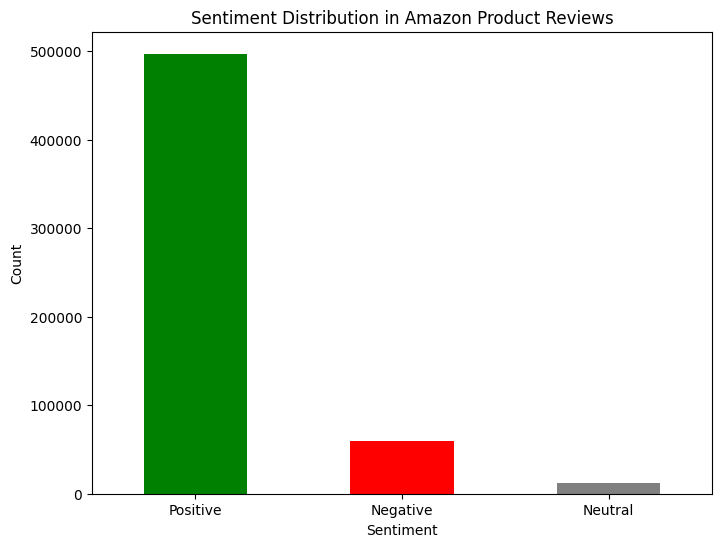

In [33]:
# Step 13: Visualize Sentiment Distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Amazon Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [34]:
# Step 14: Save the results (optional)
df_pandas.to_csv(f"{dataset_path}/amazon_reviews_with_sentiment.csv", index=False)